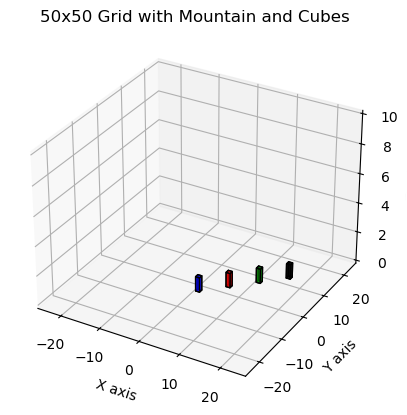

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to draw a cube
def draw_cube(ax, center, size, color):
    # Define the vertices of the cube
    r = np.array([[-0.5, -1, -0.5],
                  [0.5, -1, -0.5],
                  [0.5,  0, -0.5],
                  [-0.5,  0, -0.5],
                  [-0.5, -1,  0.5],
                  [0.5, -1,  0.5],
                  [0.5,  0,  0.5],
                  [-0.5,  0,  0.5]]) * size

    r += np.array(center)  # Adjust center for correct alignment

    # Define the faces of the cube
    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))

# Function to draw the mountain
def draw_mountain(ax, x_offset=0, y_offset=0, z_offset=0, scale_factor=1):
    # Create a custom colormap for the mountain
    colors = [(0.15, 0.35, 0.15), (0.6, 0.4, 0.2), (0.9, 0.7, 0.5), (1, 1, 1)]
    cmap_name = 'mountain'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

    # Generate mountain data with narrower range and increased amplitude
    x = np.linspace(-25, 25, 50)  # Adjusted range for x
    y = np.linspace(-25, 25, 50)  # Adjusted range for y
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2)) * 2  # Increased amplitude for taller peaks
    Z += 0.5 * np.random.randn(*X.shape)  # Adding random noise for texture

    # Cut off the sides and keep the top part
    cutoff_value = np.nanmean(Z) * 0.05  # Use a factor of the mean to adjust cutoff
    Z[Z < cutoff_value] = np.nan

    # Apply scale factor
    X *= scale_factor
    Y *= scale_factor
    Z *= scale_factor

    # Apply offsets to move the mountain
    X += x_offset
    Y += y_offset
    Z += z_offset

    # Cut off the bottom part more aggressively
    Z[Z < (Z.max() - scale_factor * 4)] = np.nan

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cm)

# Set up the figure and 3D axis with larger size
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Draw cubes of different colors at height 0
draw_cube(ax, center=(0, 0, 0), size=1, color='blue')    # Example cube at (0, 0)
draw_cube(ax, center=(5, 5, 0), size=1, color='red')     # Example cube at (5, 5)
draw_cube(ax, center=(10, 10, 0), size=1, color='green') # Example cube at (10, 10)
draw_cube(ax, center=(15, 15, 0), size=1, color='black') # Example cube at (15, 15)

# Draw the mountain with offsets and scaling
# draw_mountain(ax, x_offset=0, y_offset=0, z_offset=0, scale_factor=1)  # Example offsets and scaling factor

# Set the limits and labels with increased space
ax.set_xlim([-25, 25])  # Adjusted for the larger size of mountain
ax.set_ylim([-25, 25])  # Adjusted for the larger size of mountain
ax.set_zlim([0, 10])    # Adjusted to start from 0
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('50x50 Grid with Mountain and Cubes')

# Show the plot
plt.show()


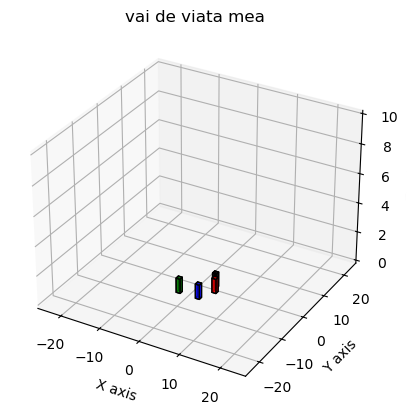

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to draw a cube
def draw_cube(ax, center, size, color):
    # Define the vertices of the cube
    r = np.array([[-0.5, -1, -0.5],
                  [0.5, -1, -0.5],
                  [0.5,  0, -0.5],
                  [-0.5,  0, -0.5],
                  [-0.5, -1,  0.5],
                  [0.5, -1,  0.5],
                  [0.5,  0,  0.5],
                  [-0.5,  0,  0.5]]) * size

    r += np.array(center) - np.array([0, 0.1, 0.5]) * size  # Adjust center for Y-axis alignment

    # Define the faces of the cube
    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))

# Function to draw the mountain
def draw_mountain(ax, x_offset=0, y_offset=0, z_offset=0, scale_factor=1):
    # Create a custom colormap for the mountain
    colors = [(0.15, 0.35, 0.15), (0.6, 0.4, 0.2), (0.9, 0.7, 0.5), (1, 1, 1)]
    cmap_name = 'mountain'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

    # Generate mountain data with narrower range and increased amplitude
    x = np.linspace(-1, 1, 25)  # Adjusted range for x
    y = np.linspace(-1, 1, 25)  # Adjusted range for y
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2)) * 2  # Increased amplitude for taller peaks
    Z += 0.5 * np.random.randn(*X.shape)  # Adding random noise for texture

    # Cut off the sides and keep the top part
    cutoff_value = np.nanmean(Z) * 0.05  # Use a factor of the mean to adjust cutoff
    Z[Z < cutoff_value] = np.nan

    # Apply scale factor
    X *= scale_factor
    Y *= scale_factor
    Z *= scale_factor

    # Apply offsets to move the mountain
    X += x_offset
    Y += y_offset
    Z += z_offset

    # Cut off the bottom part more aggressively
    Z[Z < (Z.max() - scale_factor * 4)] = np.nan

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cm)

# Set up the figure and 3D axis with larger size
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Draw cubes of different colors at height 0
draw_cube(ax, center=(0, 0, 0), size=1, color='blue')    # Cell (0,0)
draw_cube(ax, center=(2, 4, 0), size=1, color='red')      # Cell (1,0)
draw_cube(ax, center=(-5, 0, 0), size=1, color='green')   # Cell (0,1)
draw_cube(ax, center=(1, 6, 0), size=1, color='black')    # Cell (1,1)

# Draw the mountain with offsets and scaling
draw_mountain(ax, x_offset=-15, y_offset=25, z_offset=-30, scale_factor=2)  # Example offsets and scaling factor

# Set the limits and labels with increased space
ax.set_xlim([-25, 25])  # Adjusted for the larger size of mountain
ax.set_ylim([-25, 25])  # Adjusted for the larger size of mountain
ax.set_zlim([0, 10])  # Adjusted to start from 0
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('vai de viata mea')

# Show the plot
plt.show()

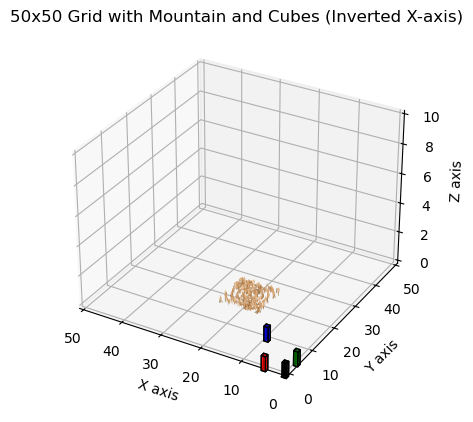

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to draw a cube
def draw_cube(ax, center, size, color):
    # Define the vertices of the cube
    r = np.array([[-0.5, -0.5, -0.5],
                  [0.5, -0.5, -0.5],
                  [0.5,  0.5, -0.5],
                  [-0.5,  0.5, -0.5],
                  [-0.5, -0.5,  0.5],
                  [0.5, -0.5,  0.5],
                  [0.5,  0.5,  0.5],
                  [-0.5,  0.5,  0.5]]) * size

    # Adjust vertices to be centered at the specified center
    r += np.array(center)

    # Define the faces of the cube
    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))

# Function to draw the mountain
def draw_mountain(ax, x_offset=0, y_offset=0, z_offset=0, scale_factor=1):
    # Create a custom colormap for the mountain
    colors = [(0.15, 0.35, 0.15), (0.6, 0.4, 0.2), (0.9, 0.7, 0.5), (1, 1, 1)]
    cmap_name = 'mountain'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

    # Generate mountain data with narrower range and increased amplitude
    x = np.linspace(-25, 25, 50)  # Adjusted range for x
    y = np.linspace(-25, 25, 50)  # Adjusted range for y
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2)) * 2  # Increased amplitude for taller peaks
    Z += 0.5 * np.random.randn(*X.shape)  # Adding random noise for texture

    # Cut off the sides and keep the top part
    cutoff_value = np.nanmean(Z) * 0.05  # Use a factor of the mean to adjust cutoff
    Z[Z < cutoff_value] = np.nan

    # Apply scale factor
    X *= scale_factor
    Y *= scale_factor
    Z *= scale_factor

    # Apply offsets to move the mountain
    X += x_offset
    Y += y_offset
    Z += z_offset

    # Cut off the bottom part more aggressively
    Z[Z < (Z.max() - scale_factor * 4)] = np.nan

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cm)

# Set up the figure and 3D axis with larger size
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Draw cubes of different colors at height 0
draw_cube(ax, center=(10, 10, 0), size=1, color='blue')    # Example cube
draw_cube(ax, center=(5, 0, 0), size=1, color='red')     # Example cube
draw_cube(ax, center=(0, 5, 0), size=1, color='green')   # Example cube
draw_cube(ax, center=(0, 0, 0), size=1, color='black')   # Example cube

# Draw the mountain with offsets and scaling
draw_mountain(ax, x_offset=20, y_offset=20, z_offset=0, scale_factor=0.2)  # Example offsets and scaling factor

# Invert the X-axis
ax.set_xlim([50, 0])  # Invert the X-axis direction
ax.set_ylim([0, 50])  # Y-axis direction remains the same
ax.set_zlim([0, 10])    # Z-axis limits

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('50x50 Grid with Mountain and Cubes (Inverted X-axis)')

# Show the plot
plt.show()


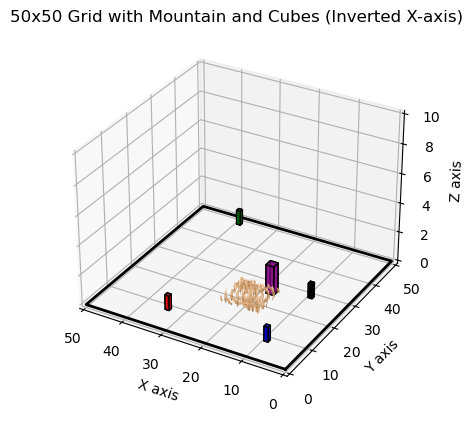

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to draw a cube
def draw_cube(ax, center, size, color):
    # Define the vertices of the cube
    r = np.array([[-0.5, -0.5, -0.5],
                  [0.5, -0.5, -0.5],
                  [0.5,  0.5, -0.5],
                  [-0.5,  0.5, -0.5],
                  [-0.5, -0.5,  0.5],
                  [0.5, -0.5,  0.5],
                  [0.5,  0.5,  0.5],
                  [-0.5,  0.5,  0.5]]) * size

    # Adjust vertices to be centered at the specified center
    r += np.array(center)

    # Define the faces of the cube
    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))
    

# Function to draw the mountain
def draw_mountain(ax, x_offset=0, y_offset=0, z_offset=0, scale_factor=1):
    # Create a custom colormap for the mountain
    colors = [(0.15, 0.35, 0.15), (0.6, 0.4, 0.2), (0.9, 0.7, 0.5), (1, 1, 1)]
    cmap_name = 'mountain'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

    # Generate mountain data with narrower range and increased amplitude
    x = np.linspace(-25, 25, 50)  # Adjusted range for x
    y = np.linspace(-25, 25, 50)  # Adjusted range for y
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2)) * 2  # Increased amplitude for taller peaks
    Z += 0.5 * np.random.randn(*X.shape)  # Adding random noise for texture

    # Cut off the sides and keep the top part
    cutoff_value = np.nanmean(Z) * 0.05  # Use a factor of the mean to adjust cutoff
    Z[Z < cutoff_value] = np.nan

    # Apply scale factor
    X *= scale_factor
    Y *= scale_factor
    Z *= scale_factor

    # Apply offsets to move the mountain
    X += x_offset
    Y += y_offset
    Z += z_offset

    # Cut off the bottom part more aggressively
    Z[Z < (Z.max() - scale_factor * 4)] = np.nan

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cm)

# Function to draw the boundary line
def draw_boundary(ax, x_min, x_max, y_min, y_max, z=0):
    # Define the vertices of the boundary line
    boundary_x = [x_min, x_max, x_max, x_min, x_min]
    boundary_y = [y_min, y_min, y_max, y_max, y_min]
    boundary_z = [z] * 5  # Constant z-value

    # Plot the boundary line
    ax.plot(boundary_x, boundary_y, boundary_z, color='k', linewidth=2)

# Set up the figure and 3D axis with larger size
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Draw cubes of different colors at height 0
draw_cube(ax, center=(10, 10, 0), size=1, color='blue')  
draw_cube(ax, center=(35, 10, 0), size=1, color='red')    
draw_cube(ax, center=(40, 50, 0), size=1, color='green')   
draw_cube(ax, center=(10, 30, 0), size=1, color='black')   

draw_cube(ax, center=(20, 30, 0), size=2, color='purple')  

# Draw the mountain with offsets and scaling
draw_mountain(ax, x_offset=20, y_offset=20, z_offset=0, scale_factor=0.2)  # Example offsets and scaling factor

# Invert the X-axis
ax.set_xlim([50, 0])  # Invert the X-axis direction
ax.set_ylim([0, 50])  # Y-axis direction remains the same
ax.set_zlim([0, 10])    # Z-axis limits

# Draw the boundary
draw_boundary(ax, x_min=0, x_max=50, y_min=0, y_max=50, z=0)

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('50x50 Grid with Mountain and Cubes (Inverted X-axis)')

# Show the plot
plt.show()


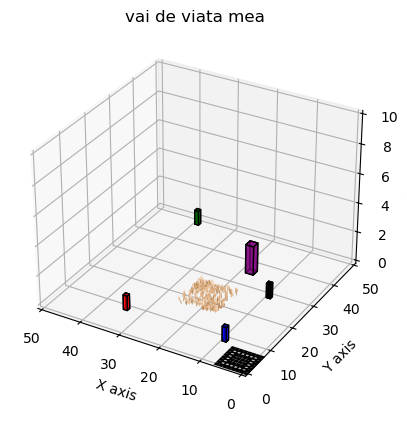

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to draw a cube
def draw_cube(ax, center, size, color):
    # Define the vertices of the cube
    r = np.array([[-0.5, -0.5, -0.5],
                  [0.5, -0.5, -0.5],
                  [0.5,  0.5, -0.5],
                  [-0.5,  0.5, -0.5],
                  [-0.5, -0.5,  0.5],
                  [0.5, -0.5,  0.5],
                  [0.5,  0.5,  0.5],
                  [-0.5,  0.5,  0.5]]) * size

    # Adjust vertices to be centered at the specified center
    r += np.array(center)

    # Define the faces of the cube
    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))

# Function to draw the mountain
def draw_mountain(ax, x_offset=0, y_offset=0, z_offset=0, scale_factor=1):
    # Create a custom colormap for the mountain
    colors = [(0.15, 0.35, 0.15), (0.6, 0.4, 0.2), (0.9, 0.7, 0.5), (1, 1, 1)]
    cmap_name = 'mountain'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

    # Generate mountain data with narrower range and increased amplitude
    x = np.linspace(-25, 25, 50)  # Adjusted range for x
    y = np.linspace(-25, 25, 50)  # Adjusted range for y
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2)) * 2  # Increased amplitude for taller peaks
    Z += 0.5 * np.random.randn(*X.shape)  # Adding random noise for texture

    # Cut off the sides and keep the top part
    cutoff_value = np.nanmean(Z) * 0.05  # Use a factor of the mean to adjust cutoff
    Z[Z < cutoff_value] = np.nan

    # Apply scale factor
    X *= scale_factor
    Y *= scale_factor
    Z *= scale_factor

    # Apply offsets to move the mountain
    X += x_offset
    Y += y_offset
    Z += z_offset

    # Cut off the bottom part more aggressively
    Z[Z < (Z.max() - scale_factor * 4)] = np.nan

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cm)

    
def draw_boundary_tiles(ax, boundary_coords, size=1, height=0.1):
    # Check if the boundary loop is closed
    is_closed_loop = boundary_coords[0] == boundary_coords[-1]

    for coord in boundary_coords:
        # Define the vertices of the tile
        x, y = coord
        r = np.array([[x - 0.5, y - 0.5, 0],
                      [x + 0.5, y - 0.5, 0],
                      [x + 0.5, y + 0.5, 0],
                      [x - 0.5, y + 0.5, 0]])

        # Shift the vertices to ground level
        r[:, 2] = 0

        # Define the faces of the tile (top and bottom only)
        faces = [[r[0], r[1], r[2], r[3]]]  # Bottom face

        # Plot the tile
        ax.add_collection3d(Poly3DCollection(faces, 
                                             facecolors='gray', 
                                             linewidths=1, 
                                             edgecolors='k', 
                                             alpha=0.5))

    # If the loop is closed, draw blacked-out tiles outside the boundary
    if is_closed_loop:
        min_x, min_y = np.min(boundary_coords, axis=0)
        max_x, max_y = np.max(boundary_coords, axis=0)

        for x in range(min_x - 1, max_x + 2):
            for y in range(min_y - 1, max_y + 2):
                if (x, y) not in boundary_coords:
                    # Define the vertices of the blacked-out tile
                    r = np.array([[x - 0.5, y - 0.5, 0],
                                  [x + 0.5, y - 0.5, 0],
                                  [x + 0.5, y + 0.5, 0],
                                  [x - 0.5, y + 0.5, 0]])

                    # Shift the vertices to ground level
                    r[:, 2] = 0

                    # Define the faces of the tile (top and bottom only)
                    faces = [[r[0], r[1], r[2], r[3]]]  # Bottom face

                    # Plot the blacked-out tile
                    ax.add_collection3d(Poly3DCollection(faces, 
                                                         facecolors='black', 
                                                         linewidths=0, 
                                                         edgecolors='k', 
                                                         alpha=1))




# Set up the figure and 3D axis with larger size
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Draw cubes of different colors at height 0
draw_cube(ax, center=(10, 10, 0), size=1, color='blue')  
draw_cube(ax, center=(35, 10, 0), size=1, color='red')    
draw_cube(ax, center=(40, 50, 0), size=1, color='green')   
draw_cube(ax, center=(10, 30, 0), size=1, color='black')   

draw_cube(ax, center=(20, 40, 0), size=2, color='purple')  

# Draw the mountain with offsets and scaling
draw_mountain(ax, x_offset=20, y_offset=20, z_offset=0, scale_factor=0.2)  # Example offsets and scaling factor

# Define boundary coordinates
boundary_coords = [
    (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5),
    (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (5, 4),
    (5, 3), (5, 2), (5, 1), (5, 0), (4, 0), (3, 0),
    (2, 0), (1, 0), (0, 0)
]

# Draw the boundary tiles
draw_boundary_tiles(ax, boundary_coords, size=1, height=0.01)

ax.set_xlim([50, 0])  
ax.set_ylim([0, 50])  
ax.set_zlim([0, 10])  

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('vai de viata mea')

# Show the plot
plt.show()


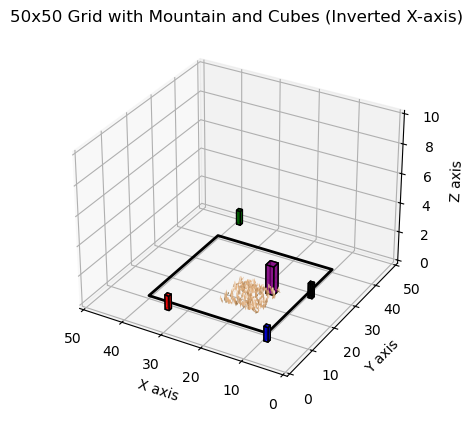

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to draw a cube
def draw_cube(ax, center, size, color):
    # Define the vertices of the cube
    r = np.array([[-0.5, -0.5, -0.5],
                  [0.5, -0.5, -0.5],
                  [0.5,  0.5, -0.5],
                  [-0.5,  0.5, -0.5],
                  [-0.5, -0.5,  0.5],
                  [0.5, -0.5,  0.5],
                  [0.5,  0.5,  0.5],
                  [-0.5,  0.5,  0.5]]) * size

    # Adjust vertices to be centered at the specified center
    r += np.array(center)

    # Define the faces of the cube
    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))
    

# Function to draw the mountain
def draw_mountain(ax, x_offset=0, y_offset=0, z_offset=0, scale_factor=1):
    # Create a custom colormap for the mountain
    colors = [(0.15, 0.35, 0.15), (0.6, 0.4, 0.2), (0.9, 0.7, 0.5), (1, 1, 1)]
    cmap_name = 'mountain'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

    # Generate mountain data with narrower range and increased amplitude
    x = np.linspace(-25, 25, 50)  # Adjusted range for x
    y = np.linspace(-25, 25, 50)  # Adjusted range for y
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2)) * 2  # Increased amplitude for taller peaks
    Z += 0.5 * np.random.randn(*X.shape)  # Adding random noise for texture

    # Cut off the sides and keep the top part
    cutoff_value = np.nanmean(Z) * 0.05  # Use a factor of the mean to adjust cutoff
    Z[Z < cutoff_value] = np.nan

    # Apply scale factor
    X *= scale_factor
    Y *= scale_factor
    Z *= scale_factor

    # Apply offsets to move the mountain
    X += x_offset
    Y += y_offset
    Z += z_offset

    # Cut off the bottom part more aggressively
    Z[Z < (Z.max() - scale_factor * 4)] = np.nan

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cm)

# Function to draw the boundary line
def draw_boundary(ax, x_min, x_max, y_min, y_max, z=0):
    # Define the vertices of the boundary line
    boundary_x = [x_min, x_max, x_max, x_min, x_min]
    boundary_y = [y_min, y_min, y_max, y_max, y_min]
    boundary_z = [z] * 5  # Constant z-value

    # Plot the boundary line
    ax.plot(boundary_x, boundary_y, boundary_z, color='k', linewidth=2)

# Set up the figure and 3D axis with larger size
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Draw cubes of different colors at height 0
draw_cube(ax, center=(10, 10, 0), size=1, color='blue')  
draw_cube(ax, center=(35, 10, 0), size=1, color='red')    
draw_cube(ax, center=(40, 50, 0), size=1, color='green')   
draw_cube(ax, center=(10, 30, 0), size=1, color='black')   

draw_cube(ax, center=(20, 30, 0), size=2, color='purple')  

# Draw the mountain with offsets and scaling
draw_mountain(ax, x_offset=20, y_offset=20, z_offset=0, scale_factor=0.2)  # Example offsets and scaling factor

# Invert the X-axis
ax.set_xlim([50, 0])  # Invert the X-axis direction
ax.set_ylim([0, 50])  # Y-axis direction remains the same
ax.set_zlim([0, 10])    # Z-axis limits

# Draw the boundary
draw_boundary(ax, x_min=10, x_max=40, y_min=10, y_max=40, z=0)

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('50x50 Grid with Mountain and Cubes (Inverted X-axis)')

# Show the plot
plt.show()


NameError: name 'x_offset' is not defined

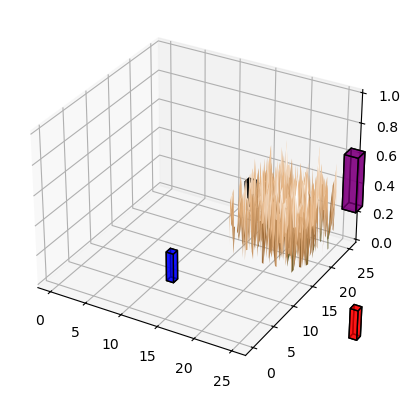

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def draw_cube(ax, center, size, color):
    # Define the vertices of the cube
    r = np.array([[-0.5, -0.5, -0.1],  # Adjusted Z-coordinate to 0.1
                  [0.5, -0.5, -0.1],
                  [0.5,  0.5, -0.1],
                  [-0.5,  0.5, -0.1],
                  [-0.5, -0.5,  0.1],  # Adjusted Z-coordinate to 0.1
                  [0.5, -0.5,  0.1],
                  [0.5,  0.5,  0.1],
                  [-0.5,  0.5,  0.1]]) * size  # Adjusted Z-coordinate to 0.1

    # Adjust vertices to be centered at the specified center
    r += np.array(center)

    # Define the faces of the cube
    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))


# Function to draw the mountain
def draw_mountain(ax, x_offset=0, y_offset=0, z_offset=0, scale_factor=1):
    # Create a custom colormap for the mountain
    colors = [(0.15, 0.35, 0.15), (0.6, 0.4, 0.2), (0.9, 0.7, 0.5), (1, 1, 1)]
    cmap_name = 'mountain'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

    # Generate mountain data with narrower range and increased amplitude
    x = np.linspace(-25, 25, 50)  # Adjusted range for x
    y = np.linspace(-25, 25, 50)  # Adjusted range for y
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2)) * 2  # Increased amplitude for taller peaks
    Z += 0.5 * np.random.randn(*X.shape)  # Adding random noise for texture

    # Cut off the sides and keep the top part
    cutoff_value = np.nanmean(Z) * 0.05  # Use a factor of the mean to adjust cutoff
    Z[Z < cutoff_value] = np.nan

    # Apply scale factor
    X *= scale_factor
    Y *= scale_factor
    Z *= scale_factor

    # Apply offsets to move the mountain
    X += x_offset
    Y += y_offset
    Z += z_offset

    # Cut off the bottom part more aggressively
    Z[Z < (Z.max() - scale_factor * 4)] = np.nan

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cm)

    
def draw_boundary_tiles(ax, boundary_coords, size=1, height=0.1):
    # Create a set of all coordinates inside the boundary
    boundary_set = set(boundary_coords)

    # Define the bounding box of the boundary
    min_x, min_y = np.min(boundary_coords, axis=0)
    max_x, max_y = np.max(boundary_coords, axis=0)

    # Iterate over all coordinates within the bounding box
    for x in range(0, 50):
        for y in range(0, 50):
            # If the coordinate is inside the boundary, draw a boundary tile
            # if (x, y) not in boundary_set or 
            if (x < min_x or x > max_x or y < min_y or y > max_y):
                
                  
                # If the coordinate is outside the boundary, draw a blacked-out tile
                # Define the vertices of the blacked-out tile
                r = np.array([[x - 0.5, y - 0.5, 0],
                              [x + 0.5, y - 0.5, 0],
                              [x + 0.5, y + 0.5, 0],
                              [x - 0.5, y + 0.5, 0]])

                # Shift the vertices to ground level
                r[:, 2] = 0

                # Define the faces of the tile (top and bottom only)
                faces = [[r[0], r[1], r[2], r[3]]]  # Bottom face

                # Plot the blacked-out tile
                ax.add_collection3d(Poly3DCollection(faces, 
                                                     facecolors='black', 
                                                     linewidths=0, 
                                                     edgecolors='k', 
                                                     alpha=1))


# Set up the figure and 3D axis with larger size
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Draw cubes of different colors at height 0
draw_cube(ax, center=(10, 10, 0), size=1, color='blue')  
draw_cube(ax, center=(35, 10, 0), size=1, color='red')    
draw_cube(ax, center=(40, 40, 0), size=1, color='green')   
draw_cube(ax, center=(10, 30, 0), size=1, color='black')   

draw_cube(ax, center=(20, 40, 0), size=2, color='purple')  

# Draw the mountain with offsets and scaling
draw_mountain(ax, x_offset=20, y_offset=20, z_offset=0, scale_factor=0.2)  # Example offsets and scaling factor

# Define boundary coordinates for a square with irregularities from (10, 10) to (40, 40)
boundary_coords = []
for x in range(10, 41):
    for y in range(10, 41):
        # Introduce randomness to the coordinates within a certain range
        # x_offset = random.randint(-5, 5)  # Random offset for x-coordinate
        # y_offset = random.randint(-5, 5)  # Random offset for y-coordinate
        boundary_coords.append((x + x_offset, y + y_offset))

# Draw the boundary tiles
draw_boundary_tiles(ax, boundary_coords, size=1, height=0.001)

ax.set_xlim([50, 0])  
ax.set_ylim([0, 50])  
ax.set_zlim([0, 10])  

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('vai de viata mea')

# Show the plot
plt.show()

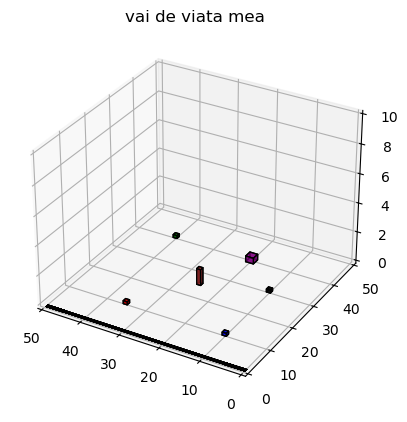

In [10]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection



# methods

def draw_rock(ax, center, size=1, color='brown'):
    
  height_factor = -10

  # Define the vertices of the rock cube (similar to draw_cube)
  r = np.array([[-0.5, -0.5, -0.1],
                [0.5, -0.5, -0.1],
                [0.5, 0.5, -0.1],
                [-0.5, 0.5, -0.1],
                [-0.5, -0.5, -0.1 * height_factor],
                [0.5, -0.5, -0.1 * height_factor],
                [0.5, 0.5, -0.1 * height_factor],
                [-0.5, 0.5, -0.1 * height_factor]]) * size

  r += np.array(center)

  faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

  # Plot the rock cube
  ax.add_collection3d(Poly3DCollection(faces,
                                       facecolors=color,
                                       linewidths=1,
                                       edgecolors='k',
                                       alpha=0.7))


def draw_cube(ax, center, size, color):
    # Define the vertices of the cube
    r = np.array([[-0.5, -0.5, -0.1],  
                  [0.5, -0.5, -0.1],
                  [0.5,  0.5, -0.1],
                  [-0.5,  0.5, -0.1],
                  [-0.5, -0.5,  0.1],  
                  [0.5, -0.5,  0.1],
                  [0.5,  0.5,  0.1],
                  [-0.5,  0.5,  0.1]]) * size  

    r += np.array(center)

    # Define the faces of the cube
    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))

    
def draw_mountain(ax, x_offset=0, y_offset=0, z_offset=0, scale_factor=1):
    # Create a custom colormap for the mountain
    colors = [(0.15, 0.35, 0.15), (0.6, 0.4, 0.2), (0.9, 0.7, 0.5), (1, 1, 1)]
    cmap_name = 'mountain'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

    x = np.linspace(-25, 25, 50) 
    y = np.linspace(-25, 25, 50) 
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2)) * 2
    Z += 0.5 * np.random.randn(*X.shape)  # Adding random noise for texture

    # Cut off the sides and keep the top part
    cutoff_value = np.nanmean(Z) * 0.05  # Use a factor of the mean to adjust cutoff
    Z[Z < cutoff_value] = np.nan

    # Apply scale factor
    X *= scale_factor
    Y *= scale_factor
    Z *= scale_factor

    # Apply offsets to move the mountain
    X += x_offset
    Y += y_offset
    Z += z_offset

    # Cut off the bottom part more aggressively
    Z[Z < (Z.max() - scale_factor * 4)] = np.nan

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cm)
    
    # draw_mountain(ax, x_offset=20, y_offset=20, z_offset=0, scale_factor=0.2)  # Example offsets and scaling factor

        
def draw_tile(ax, x, y):
    r = np.array([[x - 0.5, y - 0.5, 0],
                  [x + 0.5, y - 0.5, 0],
                  [x + 0.5, y + 0.5, 0],
                  [x - 0.5, y + 0.5, 0]])

    r[:, 2] = 0

    faces = [[r[0], r[1], r[2], r[3]]]
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors='black', 
                                         linewidths=0, 
                                         edgecolors='k', 
                                         alpha=1))
    
def draw_boundary_tiles(ax, boundary_coords, size=1, height=0.1):
    # Create a set of all coordinates inside the boundary
    boundary_set = set(boundary_coords)

    # Define the bounding box of the boundary
    min_x, min_y = np.min(boundary_coords, axis=0)
    max_x, max_y = np.max(boundary_coords, axis=0)

    # Iterate over all coordinates within the bounding box
    for x in range(0, 50):
        for y in range(0, 50):
            # If the coordinate is inside the boundary, draw a boundary tile
            # if (x, y) not in boundary_set or 
            if (x < min_x or x > max_x or y < min_y or y > max_y):
                
                  
                # If the coordinate is outside the boundary, draw a blacked-out tile
                # Define the vertices of the blacked-out tile
                draw_tile(ax, x = x, y = y)

# Set up the figure and 3D axis with larger size
fig = plt.figure()
ax = fig.add_subplot(projection='3d')



# Retrieve the data

# Define boundary coordinates for a square with irregularities from (10, 10) to (40, 40)
boundary_coords = []
for x in range(5, 45):
    for y in range(5, 45):
        boundary_coords.append((x, y))
        

# Draw the objects

blue_sm = [[10, 10, 0], 1, 'blue']
red_sm = [[35, 10, 0], 1, 'red']
green_sm = [[40, 40, 0], 1, 'green']
black_sm = [[10, 30, 0], 1, 'black']

purple_sm = [[20, 40, 0], 2, 'purple']

cube = blue_sm


# cubes

cubes = [[[10, 10, 0], 1, 'blue'], [[35, 10, 0], 1, 'red']]

for cube in cubes:
        draw_cube(ax, center=(cube[0]), size=cube[1], color=cube[2])  
   
draw_cube(ax, center=(40, 40, 0), size=1, color='green')   
draw_cube(ax, center=(10, 30, 0), size=1, color='black')   

draw_cube(ax, center=(20, 40, 0), size=2, color='purple')

# mountain
draw_rock(ax, center=(25, 25, 0))
draw_rock(ax, center=(25, 25, 0))
draw_rock(ax, center=(25, 25, 0))
draw_rock(ax, center=(25, 25, 0))
draw_rock(ax, center=(25, 25, 0))
draw_rock(ax, center=(25, 25, 0))

# boundary
draw_boundary_tiles(ax, boundary_coords, size=1, height=0.001)

ax.set_xlim([50, 0])  
ax.set_ylim([0, 50])  
ax.set_zlim([0, 10])  


ax.set_title('vai de viata mea')

# Show the plot
plt.show()
#plt.savefig("venusmap")

TO DO: Adjust the code so that it receives input 50x50 matrix

TO DO: Boundary method does not work with non-square boundary

<IPython.core.display.Javascript object>


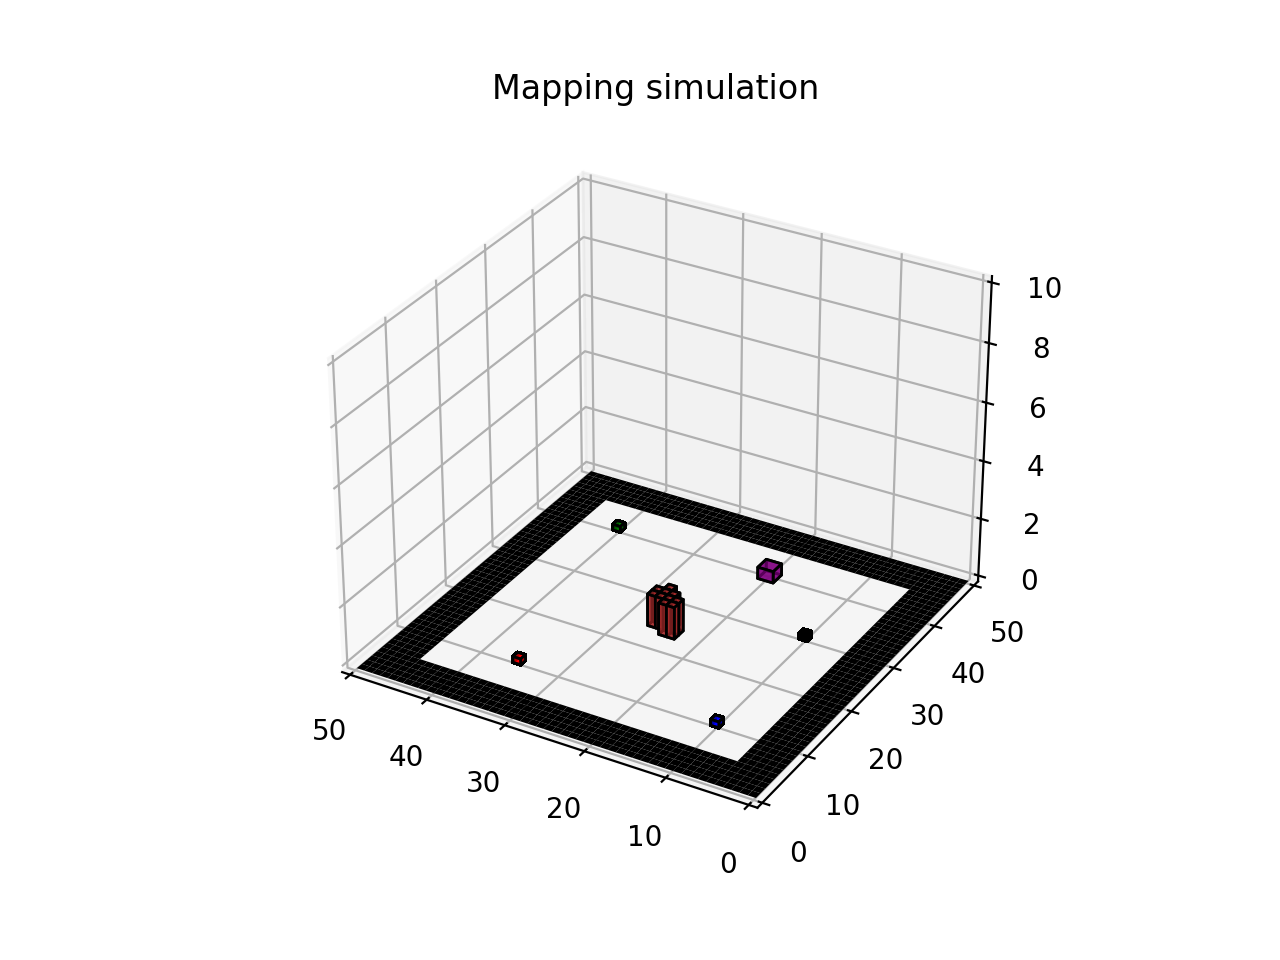

/var/folders/qm/qs7vw5wd4p71_c964glgg31r0000gn/T/ipykernel_3178/2716621646.py:213: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)


In [3]:
%matplotlib notebook


# imports

import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import matplotlib.animation as animation


# methods

def draw_rock(ax, center, size=1, color='brown'):
    
  height_factor = -10

  # Define the vertices of the rock cube (similar to draw_cube)
  r = np.array([[-0.5, -0.5, -0.1],
                [0.5, -0.5, -0.1],
                [0.5, 0.5, -0.1],
                [-0.5, 0.5, -0.1],
                [-0.5, -0.5, -0.1 * height_factor],
                [0.5, -0.5, -0.1 * height_factor],
                [0.5, 0.5, -0.1 * height_factor],
                [-0.5, 0.5, -0.1 * height_factor]]) * size

  r += np.array(center)

  faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

  # Plot the rock cube
  ax.add_collection3d(Poly3DCollection(faces,
                                       facecolors=color,
                                       linewidths=1,
                                       edgecolors='k',
                                       alpha=0.7))


def draw_cube(ax, center, size, color):
    # Define the vertices of the cube
    r = np.array([[-0.5, -0.5, -0.1],  
                  [0.5, -0.5, -0.1],
                  [0.5,  0.5, -0.1],
                  [-0.5,  0.5, -0.1],
                  [-0.5, -0.5,  0.1],  
                  [0.5, -0.5,  0.1],
                  [0.5,  0.5,  0.1],
                  [-0.5,  0.5,  0.1]]) * size  

    r += np.array(center)

    # Define the faces of the cube
    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))

    
def draw_mountain(ax, x_offset=0, y_offset=0, z_offset=0, scale_factor=1):
    # Create a custom colormap for the mountain
    colors = [(0.15, 0.35, 0.15), (0.6, 0.4, 0.2), (0.9, 0.7, 0.5), (1, 1, 1)]
    cmap_name = 'mountain'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

    x = np.linspace(-25, 25, 50) 
    y = np.linspace(-25, 25, 50) 
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2)) * 2
    Z += 0.5 * np.random.randn(*X.shape)  # Adding random noise for texture

    # Cut off the sides and keep the top part
    cutoff_value = np.nanmean(Z) * 0.05  # Use a factor of the mean to adjust cutoff
    Z[Z < cutoff_value] = np.nan

    # Apply scale factor
    X *= scale_factor
    Y *= scale_factor
    Z *= scale_factor

    # Apply offsets to move the mountain
    X += x_offset
    Y += y_offset
    Z += z_offset

    # Cut off the bottom part more aggressively
    Z[Z < (Z.max() - scale_factor * 4)] = np.nan

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cm)
    
    # draw_mountain(ax, x_offset=20, y_offset=20, z_offset=0, scale_factor=0.2)  # Example offsets and scaling factor

    
def draw_boundary_tiles(ax, boundary_coords, size=1, height=0.1):
    # Create a set of all coordinates inside the boundary
    boundary_set = set(boundary_coords)

    # Define the bounding box of the boundary
    min_x, min_y = np.min(boundary_coords, axis=0)
    max_x, max_y = np.max(boundary_coords, axis=0)

    # Iterate over all coordinates within the bounding box
    for x in range(0, 50):
        for y in range(0, 50):
            # If the coordinate is inside the boundary, draw a boundary tile
            # if (x, y) not in boundary_set or 
            if (x < min_x or x > max_x or y < min_y or y > max_y):
                
                  
                # If the coordinate is outside the boundary, draw a blacked-out tile
                # Define the vertices of the blacked-out tile
                r = np.array([[x - 0.5, y - 0.5, 0],
                              [x + 0.5, y - 0.5, 0],
                              [x + 0.5, y + 0.5, 0],
                              [x - 0.5, y + 0.5, 0]])

                # Shift the vertices to ground level
                r[:, 2] = 0

                # Define the faces of the tile (top and bottom only)
                faces = [[r[0], r[1], r[2], r[3]]]  # Bottom face

                # Plot the blacked-out tile
                ax.add_collection3d(Poly3DCollection(faces, 
                                                     facecolors='black', 
                                                     linewidths=0, 
                                                     edgecolors='k', 
                                                     alpha=1))

# Set up the figure and 3D axis with larger size
fig = plt.figure()
ax = fig.add_subplot(projection='3d')



# Retrieve the data

# Define boundary coordinates for a square with irregularities from (10, 10) to (40, 40)
boundary_coords = []
for x in range(5, 45):
    for y in range(5, 45):
        boundary_coords.append((x, y))
        

# Draw the objects

blue_sm = [[10, 10, 0], 1, 'blue']
red_sm = [[35, 10, 0], 1, 'red']
green_sm = [[40, 40, 0], 1, 'green']
black_sm = [[10, 30, 0], 1, 'black']

purple_sm = [[20, 40, 0], 2, 'purple']

cube = blue_sm


# cubes

cubes = [[[10, 10, 0], 1, 'blue'], [[35, 10, 0], 1, 'red']]
     
#draw_cube(ax, center=(10, 30, 0), size=1, color='black')   

draw_cube(ax, center=(20, 40, 0), size=2, color='purple')

# mountain
draw_rock(ax, center=(25, 25, 0))
draw_rock(ax, center=(26, 25, 0))
draw_rock(ax, center=(25, 26, 0))
draw_rock(ax, center=(24, 25, 0))
draw_rock(ax, center=(25, 24, 0))
draw_rock(ax, center=(24, 24, 0))
draw_rock(ax, center=(23, 24, 0))
draw_rock(ax, center=(24, 23, 0))
draw_rock(ax, center=(23, 23, 0))
draw_rock(ax, center=(26, 24, 0))

# boundary
draw_boundary_tiles(ax, boundary_coords, size=1, height=0.001)

ax.set_xlim([50, 0])  
ax.set_ylim([0, 50])  
ax.set_zlim([0, 10])  


ax.set_title('Mapping simulation')

def animate(i):

    for cube in cubes:
        draw_cube(ax, center=(cube[0]), size=cube[1], color=cube[2])
        
    cubes.append([[40, 40, 0], 1, 'green'])
    cubes.append([[10, 30, 0], 1, 'black'])
    
ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)

# Show the plot
plt.show()
#plt.savefig("venusmap")

<IPython.core.display.Javascript object>


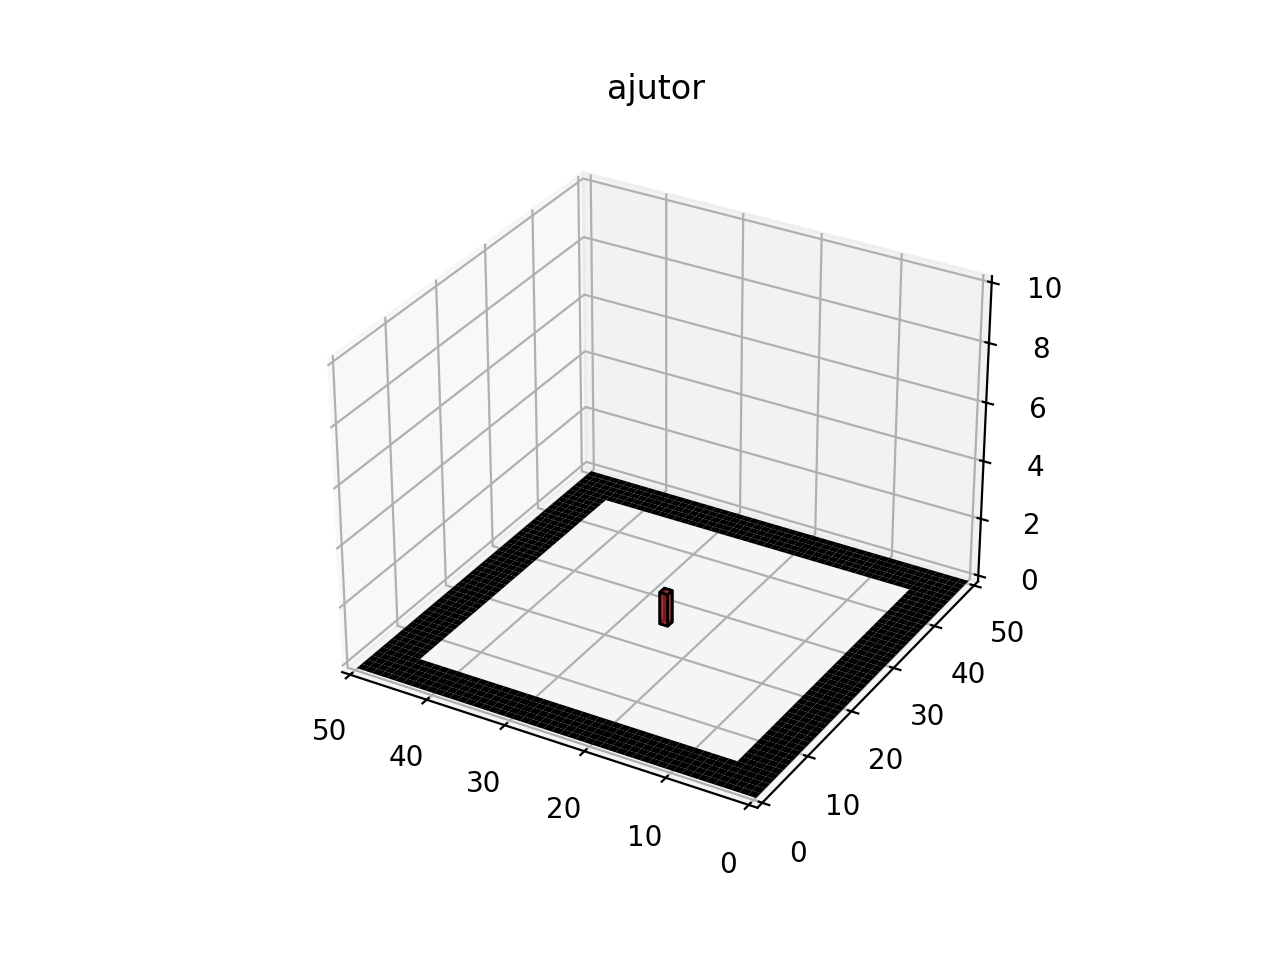

/var/folders/qm/qs7vw5wd4p71_c964glgg31r0000gn/T/ipykernel_48514/104948370.py:163: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)


In [14]:
import paho.mqtt.client as paho
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation
import threading

# Define the shared cubes list and a lock for thread-safe operations
cubes = []
cubes_lock = threading.Lock()

class Broker:
    def __init__(
        self,
        host,
        username,
        password,
        topicSubList,
        messageHandler: callable,
    ) -> None:
        self.client = paho.Client(client_id="2")
        self.client.username_pw_set(username, password)
        self.client.on_message = messageHandler

        self.client.connect(host)
        for topic in topicSubList:
            self.client.subscribe(topic)

    def start(self):
        self.client.loop_start()

    def stop(self):
        self.client.loop_stop()
        self.client.disconnect()

# Define your message handler function
def messageHandler(client, userdata, message):
    global cubes
    print(f"Received message: {message.payload.decode()} on topic {message.topic}")
    
    try:
        # Assuming the message is a string like "x,y,z,size,color"
        payload = message.payload.decode()
        x, y, z, size, color = payload.split(',')
        cube = [[int(x), int(y), int(z)], int(size), color]
        
        # Add the new cube to the list in a thread-safe manner
        with cubes_lock:
            cubes.append(cube)
    except Exception as e:
        print(f"Error parsing message: {e}")

# Instantiate the Broker class with the provided arguments
broker = Broker(
    "mqtt.ics.ele.tue.nl",  # MQTT broker host
    "Student47",  # Username
    "va2ahY5u",  # Password
    ["/pynqbridge/24/send", "/pynqbridge/24/recv"],  # List of topics to subscribe to
    messageHandler  # Message handler function
)

# Start the broker
broker.start()

# Visualization code
def draw_cube(ax, center, size, color):
    r = np.array([[-0.5, -0.5, -0.1],
                  [0.5, -0.5, -0.1],
                  [0.5,  0.5, -0.1],
                  [-0.5,  0.5, -0.1],
                  [-0.5, -0.5,  0.1],
                  [0.5, -0.5,  0.1],
                  [0.5,  0.5,  0.1],
                  [-0.5,  0.5,  0.1]]) * size

    r += np.array(center)

    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))

def draw_rock(ax, center, size=1, color='brown'):
    height_factor = -10

    r = np.array([[-0.5, -0.5, -0.1],
                  [0.5, -0.5, -0.1],
                  [0.5, 0.5, -0.1],
                  [-0.5, 0.5, -0.1],
                  [-0.5, -0.5, -0.1 * height_factor],
                  [0.5, -0.5, -0.1 * height_factor],
                  [0.5, 0.5, -0.1 * height_factor],
                  [-0.5, 0.5, -0.1 * height_factor]]) * size

    r += np.array(center)

    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    ax.add_collection3d(Poly3DCollection(faces,
                                         facecolors=color,
                                         linewidths=1,
                                         edgecolors='k',
                                         alpha=0.7))

def draw_boundary_tiles(ax, boundary_coords, size=1, height=0.1):
    boundary_set = set(boundary_coords)
    min_x, min_y = np.min(boundary_coords, axis=0)
    max_x, max_y = np.max(boundary_coords, axis=0)

    for x in range(0, 50):
        for y in range(0, 50):
            if (x < min_x or x > max_x or y < min_y or y > max_y):
                r = np.array([[x - 0.5, y - 0.5, 0],
                              [x + 0.5, y - 0.5, 0],
                              [x + 0.5, y + 0.5, 0],
                              [x - 0.5, y + 0.5, 0]])

                r[:, 2] = 0

                faces = [[r[0], r[1], r[2], r[3]]]
                ax.add_collection3d(Poly3DCollection(faces, 
                                                     facecolors='black', 
                                                     linewidths=0, 
                                                     edgecolors='k', 
                                                     alpha=1))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

boundary_coords = []
for x in range(5, 45):
    for y in range(5, 45):
        boundary_coords.append((x, y))

draw_rock(ax, center=(25, 25, 0))
draw_boundary_tiles(ax, boundary_coords, size=1, height=0.001)

ax.set_xlim([50, 0])
ax.set_ylim([0, 50])
ax.set_zlim([0, 10])
ax.set_title('ajutor')

def animate(i):
    global cubes
    with cubes_lock:
        for cube in cubes:
            draw_cube(ax, center=cube[0], size=cube[1], color=cube[2])

ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)

plt.show()

In [ ]:
import paho.mqtt.client as paho
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation
import threading

# Define the shared cubes list and a lock for thread-safe operations
cubes = []
cubes_lock = threading.Lock()

class Broker:
    """
    Creates an object that subscribes to MQTT topics and triggers a custom method upon receiving a message.
    ### Args:
    - host: The address of the host.
    - username: username credential.
    - password: password credential.
    - topicSubList (list[str]): List of topics to subscribe to.
    - messageHandler (function): Method triggered whenever a message is received.
    """

    def __init__(
        self, #Command to access class variables
        host,
        username: str,
        password: str, 
        topicSubList: list[str],
        messageHandler: callable ,
    ) -> None:
        self.client = paho.Client() 
        self.client.username_pw_set(username , password)
        self.client.on_message = messageHandler 
        if self.client.connect(host=host) != 0:
            raise RuntimeError("Couldn't connect to the MQTT host") 
        try:
            # Check for a successful subscription. It returns a tuple with code and id, we just check the code.
            for topic in topicSubList:
                if self.client.subscribe(topic)[0] != paho.MQTT_ERR_SUCCESS:
                    print(f"Couldn't subscribe to the topic: {topic}")
            # Let an unexperienced user know how to kill the process
            print("Press CTRL+C to exit...")
            self.client.loop_forever()

        except Exception as error: 
            print(error)
        finally:
            print("Disconnecting from the MQTT broker")
            self.client.disconnect()

# Define your message handler function
def messageHandler(client, userdata, message):
    global cubes
    print(f"Received message: {message.payload.decode()} on topic {message.topic}")
    
    try:
        # Assuming the message is a string like "x,y,z,size,color"
        payload = message.payload.decode()
        x, y, z, size, color = payload.split(',')
        cube = [[int(x), int(y), int(z)], int(size), color]
        
        # Add the new cube to the list in a thread-safe manner
        with cubes_lock:
            cubes.append(cube)
    except Exception as e:
        print(f"Error parsing message: {e}")

# Instantiate the Broker class with the provided arguments
broker = Broker(
    "mqtt.ics.ele.tue.nl",  # MQTT broker host
    "Student47",  # Username
    "va2ahY5u",  # Password
    ["/pynqbridge/24/send", "/pynqbridge/24/recv"],  # List of topics to subscribe to
    messageHandler  # Message handler function
)

# Visualization code
def draw_cube(ax, center, size, color):
    r = np.array([[-0.5, -0.5, -0.1],
                  [0.5, -0.5, -0.1],
                  [0.5,  0.5, -0.1],
                  [-0.5,  0.5, -0.1],
                  [-0.5, -0.5,  0.1],
                  [0.5, -0.5,  0.1],
                  [0.5,  0.5,  0.1],
                  [-0.5,  0.5,  0.1]]) * size

    r += np.array(center)

    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))

def draw_rock(ax, center, size=1, color='brown'):
    height_factor = -10

    r = np.array([[-0.5, -0.5, -0.1],
                  [0.5, -0.5, -0.1],
                  [0.5, 0.5, -0.1],
                  [-0.5, 0.5, -0.1],
                  [-0.5, -0.5, -0.1 * height_factor],
                  [0.5, -0.5, -0.1 * height_factor],
                  [0.5, 0.5, -0.1 * height_factor],
                  [-0.5, 0.5, -0.1 * height_factor]]) * size

    r += np.array(center)

    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    ax.add_collection3d(Poly3DCollection(faces,
                                         facecolors=color,
                                         linewidths=1,
                                         edgecolors='k',
                                         alpha=0.7))

def draw_boundary_tiles(ax, boundary_coords, size=1, height=0.1):
    boundary_set = set(boundary_coords)
    min_x, min_y = np.min(boundary_coords, axis=0)
    max_x, max_y = np.max(boundary_coords, axis=0)

    for x in range(0, 50):
        for y in range(0, 50):
            if (x < min_x or x > max_x or y < min_y or y > max_y):
                r = np.array([[x - 0.5, y - 0.5, 0],
                              [x + 0.5, y - 0.5, 0],
                              [x + 0.5, y + 0.5, 0],
                              [x - 0.5, y + 0.5, 0]])

                r[:, 2] = 0

                faces = [[r[0], r[1], r[2], r[3]]]
                ax.add_collection3d(Poly3DCollection(faces, 
                                                     facecolors='black', 
                                                     linewidths=0, 
                                                     edgecolors='k', 
                                                     alpha=1))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

boundary_coords = []
for x in range(5, 45):
    for y in range(5, 45):
        boundary_coords.append((x, y))

draw_rock(ax, center=(25, 25, 0))
draw_boundary_tiles(ax, boundary_coords, size=1, height=0.001)

ax.set_xlim([50, 0])
ax.set_ylim([0, 50])
ax.set_zlim([0, 10])
ax.set_title('ajutor')

def animate(i):
    global cubes
    with cubes_lock:
        for cube in cubes:
            draw_cube(ax, center=cube[0], size=cube[1], color=cube[2])

ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)

plt.show()

<IPython.core.display.Javascript object>


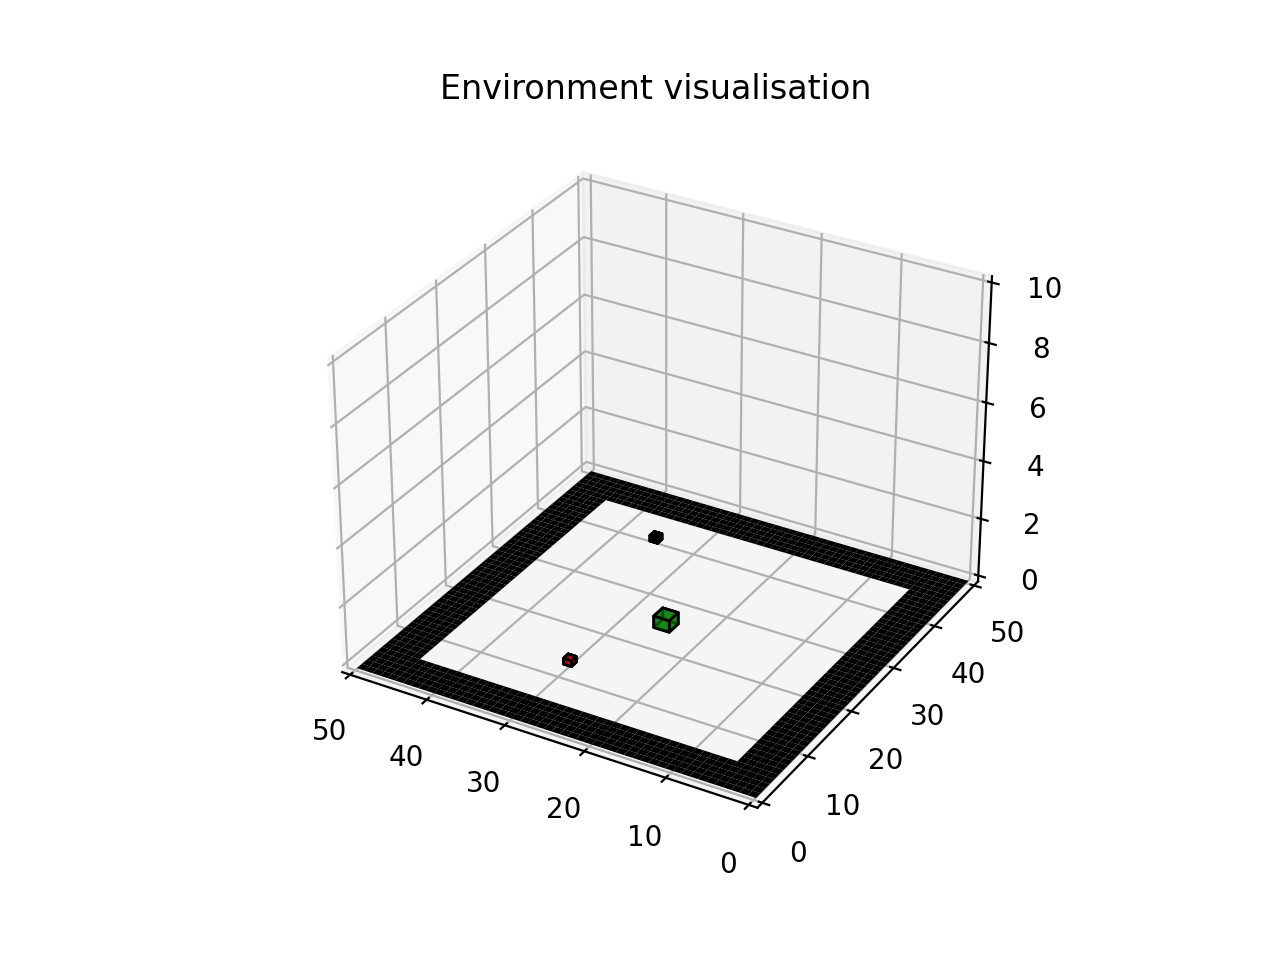

/var/folders/qm/qs7vw5wd4p71_c964glgg31r0000gn/T/ipykernel_48514/1897076987.py:203: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(plt.gcf(), animate, interval=5000)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [13]:
%matplotlib notebook


# imports

import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import matplotlib.animation as animation


# methods

def draw_rock(ax, center, size=1, color='brown'):
    
  height_factor = -10

  # Define the vertices of the rock cube (similar to draw_cube)
  r = np.array([[-0.5, -0.5, -0.1],
                [0.5, -0.5, -0.1],
                [0.5, 0.5, -0.1],
                [-0.5, 0.5, -0.1],
                [-0.5, -0.5, -0.1 * height_factor],
                [0.5, -0.5, -0.1 * height_factor],
                [0.5, 0.5, -0.1 * height_factor],
                [-0.5, 0.5, -0.1 * height_factor]]) * size

  r += np.array(center)

  faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

  # Plot the rock cube
  ax.add_collection3d(Poly3DCollection(faces,
                                       facecolors=color,
                                       linewidths=1,
                                       edgecolors='k',
                                       alpha=0.7))


def draw_cube(ax, center, size, color):
    # Define the vertices of the cube
    r = np.array([[-0.5, -0.5, -0.1],  
                  [0.5, -0.5, -0.1],
                  [0.5,  0.5, -0.1],
                  [-0.5,  0.5, -0.1],
                  [-0.5, -0.5,  0.1],  
                  [0.5, -0.5,  0.1],
                  [0.5,  0.5,  0.1],
                  [-0.5,  0.5,  0.1]]) * size  

    r += np.array(center)

    # Define the faces of the cube
    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))

    
def draw_mountain(ax, x_offset=0, y_offset=0, z_offset=0, scale_factor=1):
    # Create a custom colormap for the mountain
    colors = [(0.15, 0.35, 0.15), (0.6, 0.4, 0.2), (0.9, 0.7, 0.5), (1, 1, 1)]
    cmap_name = 'mountain'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

    x = np.linspace(-25, 25, 50) 
    y = np.linspace(-25, 25, 50) 
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2)) * 2
    Z += 0.5 * np.random.randn(*X.shape)  # Adding random noise for texture

    # Cut off the sides and keep the top part
    cutoff_value = np.nanmean(Z) * 0.05  # Use a factor of the mean to adjust cutoff
    Z[Z < cutoff_value] = np.nan

    # Apply scale factor
    X *= scale_factor
    Y *= scale_factor
    Z *= scale_factor

    # Apply offsets to move the mountain
    X += x_offset
    Y += y_offset
    Z += z_offset

    # Cut off the bottom part more aggressively
    Z[Z < (Z.max() - scale_factor * 4)] = np.nan

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap=cm)
    
    # draw_mountain(ax, x_offset=20, y_offset=20, z_offset=0, scale_factor=0.2)  # Example offsets and scaling factor

    
def draw_boundary_tiles(ax, boundary_coords, size=1, height=0.1):
    # Create a set of all coordinates inside the boundary
    boundary_set = set(boundary_coords)

    # Define the bounding box of the boundary
    min_x, min_y = np.min(boundary_coords, axis=0)
    max_x, max_y = np.max(boundary_coords, axis=0)

    # Iterate over all coordinates within the bounding box
    for x in range(0, 50):
        for y in range(0, 50):
            # If the coordinate is inside the boundary, draw a boundary tile
            # if (x, y) not in boundary_set or 
            if (x < min_x or x > max_x or y < min_y or y > max_y):
                
                  
                # If the coordinate is outside the boundary, draw a blacked-out tile
                # Define the vertices of the blacked-out tile
                r = np.array([[x - 0.5, y - 0.5, 0],
                              [x + 0.5, y - 0.5, 0],
                              [x + 0.5, y + 0.5, 0],
                              [x - 0.5, y + 0.5, 0]])

                # Shift the vertices to ground level
                r[:, 2] = 0

                # Define the faces of the tile (top and bottom only)
                faces = [[r[0], r[1], r[2], r[3]]]  # Bottom face

                # Plot the blacked-out tile
                ax.add_collection3d(Poly3DCollection(faces, 
                                                     facecolors='black', 
                                                     linewidths=0, 
                                                     edgecolors='k', 
                                                     alpha=1))

# Set up the figure and 3D axis with larger size
fig = plt.figure()
ax = fig.add_subplot(projection='3d')



# Retrieve the data

# Define boundary coordinates for a square with irregularities from (10, 10) to (40, 40)
boundary_coords = []
for x in range(5, 45):
    for y in range(5, 45):
        boundary_coords.append((x, y))
        

# Draw the objects

blue_sm = [[10, 10, 0], 1, 'blue']
red_sm = [[35, 10, 0], 1, 'red']
green_sm = [[40, 40, 0], 1, 'green']
black_sm = [[10, 30, 0], 1, 'black']

purple_sm = [[20, 40, 0], 2, 'purple']

cube = blue_sm


# cubes

cubes = [[[30, 12.5, 0], 1, 'red'], [[35, 40, 0], 1, 'black']]
     
#draw_cube(ax, center=(10, 30, 0), size=1, color='black')   

#draw_cube(ax, center=(20, 40, 0), size=1, color='green')

# mountain
# draw_rock(ax, center=(25, 25, 0))

# boundary
draw_boundary_tiles(ax, boundary_coords, size=1, height=0.001)

ax.set_xlim([50, 0])  
ax.set_ylim([0, 50])  
ax.set_zlim([0, 10])  


ax.set_title("Environment visualisation")

def animate(i):

    for cube in cubes:
        draw_cube(ax, center=(cube[0]), size=cube[1], color=cube[2])
        
    cubes.append([[25, 25, 0], 2, 'green'])
    
ani = animation.FuncAnimation(plt.gcf(), animate, interval=5000)

# Show the plot
plt.show()
#plt.savefig("venusmap")

Semi-final version of the code

NameError: name 'center' is not defined

Press CTRL+C to exit...


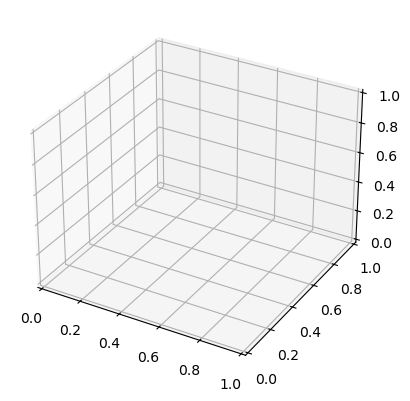

In [12]:
import paho.mqtt.client as paho
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation
import threading

# Define the shared cubes list and a lock for thread-safe operations
cubes = []
cubes_lock = threading.Lock()

class Broker(threading.Thread):
    """
    Creates an object that subscribes to MQTT topics and triggers a custom method upon receiving a message.
    ### Args:
    - host: The address of the host.
    - username: username credential.
    - password: password credential.
    - topicSubList (list[str]): List of topics to subscribe to.
    - messageHandler (function): Method triggered whenever a message is received.
    """

    def __init__(
        self, 
        host,
        username: str,
        password: str, 
        topicSubList: list[str],
        messageHandler: callable ,
    ) -> None:
        threading.Thread.__init__(self)
        self.client = paho.Client() 
        self.client.username_pw_set(username , password)
        self.client.on_message = messageHandler 
        self.host = host
        self.topicSubList = topicSubList

    def run(self):
        if self.client.connect(self.host) != 0:
            raise RuntimeError("Couldn't connect to the MQTT host") 
        try:
            # Check for a successful subscription. It returns a tuple with code and id, we just check the code.
            for topic in self.topicSubList:
                if self.client.subscribe(topic)[0] != paho.MQTT_ERR_SUCCESS:
                    print(f"Couldn't subscribe to the topic: {topic}")
            # Let an unexperienced user know how to kill the process
            print("Press CTRL+C to exit...")
            self.client.loop_forever()
        except Exception as error: 
            print(error)
        finally:
            print("Disconnecting from the MQTT broker")
            self.client.disconnect()

# Define your message handler function
def messageHandler(client, userdata, message):
    global obstacles
    print(f"Received message: {message.payload.decode()} on topic {message.topic}")
    
    try:
        # Assuming the message is a string like "x,y,z,size,color"
        payload = message.payload.decode()
        identifier, x, y, z, size, color = payload.split(',')

        obstacle = [[int(identifier), int(x), int(y), int(z)], int(size), color]
        
        
        # Add the new cube to the list in a thread-safe manner
        with cubes_lock:
            obstacles.append(obstacle)
    except Exception as e:
        print(f"Error parsing message: {e}")

# Instantiate the Broker class with the provided arguments
broker = Broker(
    "mqtt.ics.ele.tue.nl",  # MQTT broker host
    "Student47",  # Username
    "va2ahY5u",  # Password
    ["/pynqbridge/24/send", "/pynqbridge/24/recv"],  # List of topics to subscribe to
    messageHandler  # Message handler function
)

# Start the broker in a separate thread
broker.start()

# Visualization code
def draw_cube(ax, center, size, color):
    r = np.array([[-0.5, -0.5, -0.1],
                  [0.5, -0.5, -0.1],
                  [0.5,  0.5, -0.1],
                  [-0.5,  0.5, -0.1],
                  [-0.5, -0.5,  0.1],
                  [0.5, -0.5,  0.1],
                  [0.5,  0.5,  0.1],
                  [-0.5,  0.5,  0.1]]) * size

    r += np.array(center)

    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))

def draw_rock(ax, center, size=1, color='brown'):
    height_factor = -10

    r = np.array([[-0.5, -0.5, -0.1],
                  [0.5, -0.5, -0.1],
                  [0.5, 0.5, -0.1],
                  [-0.5, 0.5, -0.1],
                  [-0.5, -0.5, -0.1 * height_factor],
                  [0.5, -0.5, -0.1 * height_factor],
                  [0.5, 0.5, -0.1 * height_factor],
                  [-0.5, 0.5, -0.1 * height_factor]]) * size

    r += np.array(center)

    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    ax.add_collection3d(Poly3DCollection(faces,
                                         facecolors=color,
                                         linewidths=1,
                                         edgecolors='k',
                                         alpha=0.7))
    
def draw_tile(ax, center):
    r = np.array([[x - 0.5, y - 0.5, 0],
                  [x + 0.5, y - 0.5, 0],
                  [x + 0.5, y + 0.5, 0],
                  [x - 0.5, y + 0.5, 0]])

    r += np.array(center)

    faces = [[r[0], r[1], r[2], r[3]]]
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors='black', 
                                         linewidths=0, 
                                         edgecolors='k', 
                                         alpha=1))

def draw_boundary_tiles(ax, boundary_coords, size=1, height=0.1):
    boundary_set = set(boundary_coords)
    min_x, min_y = np.min(boundary_coords, axis=0)
    max_x, max_y = np.max(boundary_coords, axis=0)

    for x in range(0, 50):
        for y in range(0, 50):
            if (x < min_x or x > max_x or y < min_y or y > max_y):
                draw_tile()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

boundary_coords = []
for x in range(5, 45):
    for y in range(5, 45):
        boundary_coords.append((x, y))

draw_tile(ax, center[10, 10, 0])
#draw_boundary_tiles(ax, boundary_coords, size=1, height=0.001)

ax.set_xlim([50, 0])
ax.set_ylim([0, 50])
ax.set_zlim([0, 10])
ax.set_title('ajutor')

def animate(i):
    global obstacles
    with obstacles_lock:
        for obstacle in obstacles:
            if obstacle[0] == 1:
                draw_cube(ax, center=obstacle[1], size=obstacle[2], color=obstacle[3])
            elif obstacle[0] == 2:
                draw_rock(ax, center=obstacle[1])
            elif obstacle[0] == 3:
                draw_tile(ax, center=obstacle[1])

ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)

plt.show()


/var/folders/qm/qs7vw5wd4p71_c964glgg31r0000gn/T/ipykernel_48514/4056071328.py:191: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)


Press CTRL+C to exit...


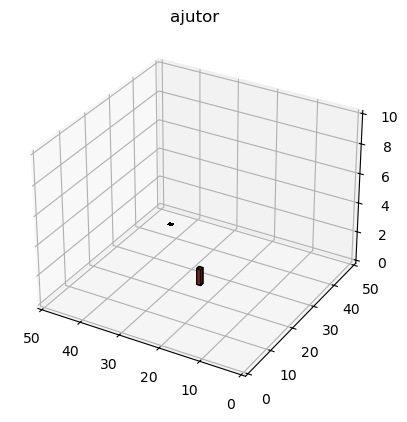

In [11]:
import paho.mqtt.client as paho
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation
import threading

# Define the shared cubes list and a lock for thread-safe operations
cubes = []
cubes_lock = threading.Lock()

class Broker(threading.Thread):
    """
    Creates an object that subscribes to MQTT topics and triggers a custom method upon receiving a message.
    ### Args:
    - host: The address of the host.
    - username: username credential.
    - password: password credential.
    - topicSubList (list[str]): List of topics to subscribe to.
    - messageHandler (function): Method triggered whenever a message is received.
    """

    def __init__(
        self, 
        host,
        username: str,
        password: str, 
        topicSubList: list[str],
        messageHandler: callable ,
    ) -> None:
        threading.Thread.__init__(self)
        self.client = paho.Client() 
        self.client.username_pw_set(username , password)
        self.client.on_message = messageHandler 
        self.host = host
        self.topicSubList = topicSubList

    def run(self):
        if self.client.connect(self.host) != 0:
            raise RuntimeError("Couldn't connect to the MQTT host") 
        try:
            # Check for a successful subscription. It returns a tuple with code and id, we just check the code.
            for topic in self.topicSubList:
                if self.client.subscribe(topic)[0] != paho.MQTT_ERR_SUCCESS:
                    print(f"Couldn't subscribe to the topic: {topic}")
            # Let an unexperienced user know how to kill the process
            print("Press CTRL+C to exit...")
            self.client.loop_forever()
        except Exception as error: 
            print(error)
        finally:
            print("Disconnecting from the MQTT broker")
            self.client.disconnect()

# Define your message handler function
def messageHandler(client, userdata, message):
    global cubes
    print(f"Received message: {message.payload.decode()} on topic {message.topic}")
    
    try:
        # Assuming the message is a string like "x,y,z,size,color"
        payload = message.payload.decode()
        type, x, y, z, size, color = payload.split(',')

        if type == 1:
            cube = [[int(x), int(y), int(z)], int(size), color]
        elif type == 2:
            cube = [[int(x), int(y), int(z)], int(size), color]
        elif type == 3:
            boundary = [[int(x), int(y), int(z)], int(size), color]
        
        # Add the new cube to the list in a thread-safe manner
        with cubes_lock:
            cubes.append(cube)
    except Exception as e:
        print(f"Error parsing message: {e}")

# Instantiate the Broker class with the provided arguments
broker = Broker(
    "mqtt.ics.ele.tue.nl",  # MQTT broker host
    "Student47",  # Username
    "va2ahY5u",  # Password
    ["/pynqbridge/24/send", "/pynqbridge/24/recv"],  # List of topics to subscribe to
    messageHandler  # Message handler function
)

# Start the broker in a separate thread
broker.start()

# Visualization code
def draw_cube(ax, center, size, color):
    r = np.array([[-0.5, -0.5, -0.1],
                  [0.5, -0.5, -0.1],
                  [0.5,  0.5, -0.1],
                  [-0.5,  0.5, -0.1],
                  [-0.5, -0.5,  0.1],
                  [0.5, -0.5,  0.1],
                  [0.5,  0.5,  0.1],
                  [-0.5,  0.5,  0.1]]) * size

    r += np.array(center)

    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors=color, 
                                         linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.7))

def draw_rock(ax, center, size=1, color='brown'):
    height_factor = -10

    r = np.array([[-0.5, -0.5, -0.1],
                  [0.5, -0.5, -0.1],
                  [0.5, 0.5, -0.1],
                  [-0.5, 0.5, -0.1],
                  [-0.5, -0.5, -0.1 * height_factor],
                  [0.5, -0.5, -0.1 * height_factor],
                  [0.5, 0.5, -0.1 * height_factor],
                  [-0.5, 0.5, -0.1 * height_factor]]) * size

    r += np.array(center)

    faces = [[r[0], r[1], r[2], r[3]],  # Bottom face
             [r[4], r[5], r[6], r[7]],  # Top face
             [r[0], r[1], r[5], r[4]],  # Front face
             [r[2], r[3], r[7], r[6]],  # Back face
             [r[1], r[2], r[6], r[5]],  # Right face
             [r[4], r[7], r[3], r[0]]]  # Left face

    ax.add_collection3d(Poly3DCollection(faces,
                                         facecolors=color,
                                         linewidths=1,
                                         edgecolors='k',
                                         alpha=0.7))
    
def draw_tile():
    r = np.array([[x - 0.5, y - 0.5, 0],
                  [x + 0.5, y - 0.5, 0],
                  [x + 0.5, y + 0.5, 0],
                  [x - 0.5, y + 0.5, 0]])

    r[:, 2] = 0

    faces = [[r[0], r[1], r[2], r[3]]]
    ax.add_collection3d(Poly3DCollection(faces, 
                                         facecolors='black', 
                                         linewidths=0, 
                                         edgecolors='k', 
                                         alpha=1))

def draw_boundary_tiles(ax, boundary_coords, size=1, height=0.1):
    boundary_set = set(boundary_coords)
    min_x, min_y = np.min(boundary_coords, axis=0)
    max_x, max_y = np.max(boundary_coords, axis=0)

    for x in range(0, 50):
        for y in range(0, 50):
            if (x < min_x or x > max_x or y < min_y or y > max_y):
                draw_tile()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

boundary_coords = []
for x in range(5, 45):
    for y in range(5, 45):
        boundary_coords.append((x, y))

draw_rock(ax, center=(25, 25, 0))
draw_boundary_tiles(ax, boundary_coords, size=1, height=0.001)

ax.set_xlim([50, 0])
ax.set_ylim([0, 50])
ax.set_zlim([0, 10])
ax.set_title('ajutor')

def animate(i):
    global cubes
    with cubes_lock:
        for cube in cubes:
            draw_cube(ax, center=cube[0], size=cube[1], color=cube[2])

ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)

plt.show()
